In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os    
import json
import statistics

# Part I: Correlation of graph metric and initial information with final state of nodes

In [2]:
df_labels = pd.read_csv('csvjoinv2/grid.join.node.csv', sep=';')
df_features = pd.read_csv('../../network_specs/grid.specs.csv', sep=';')

#df_features.drop(columns='state', inplace=True)

In [3]:
df_labels['State'] = np.where(
    df_labels['State'] == 'Recovered',
    0,
    1
)

In [4]:
df_labels['State'].value_counts()

0    728872
1       128
Name: State, dtype: int64

In [5]:
df_labels['Id'].value_counts()

(19, 17)    1000
(20, 15)    1000
(5, 5)      1000
(19, 10)    1000
(6, 3)      1000
            ... 
(2, 0)      1000
(13, 10)    1000
(9, 8)      1000
(5, 16)     1000
(16, 8)     1000
Name: Id, Length: 729, dtype: int64

In [6]:
df_no_recover_proba = df_labels.groupby('Id')['State'].mean().reset_index(drop=False)
df_no_recover_proba

,Id,State
0,"(0, 0)",0.008
1,"(0, 1)",0.000
2,"(0, 10)",0.000
3,"(0, 11)",0.000
4,"(0, 12)",0.000
...,...,...
724,"(9, 5)",0.000
725,"(9, 6)",0.000
726,"(9, 7)",0.000
727,"(9, 8)",0.000


In [7]:
df_data = df_no_recover_proba.merge(
    df_features,
    on='Id',
    how='left'
)

In [8]:
df_data['binary_state'] = df_data['State'] > 0.0

#df_data.drop(columns='Label', inplace=True)
#df_data.drop(columns='timeset', inplace=True)
#df_data.drop(columns='componentnumber', inplace=True)


In [9]:
folder = './jsonDataReport'
roundData = {}

files = os.listdir(folder)
for fname in files:    
        with open(folder+'/'+fname, "r") as f:
            data = json.load(f)  
        node_nneigh = []
        for node_id, node_data in data['0'].items():
            node_data_small = {
                'Id': node_id,
                'nneighWithNodeInfo': node_data['nneighWithNodeInfo']
            }
            node_nneigh.append(node_data_small)
        df_nneigh = pd.DataFrame(node_nneigh)  
        break
        
df_nneigh.head() #nneighWithNodeInfo

,Id,nneighWithNodeInfo
0,"(23, 14)",13
1,"(23, 26)",9
2,"(9, 4)",13
3,"(2, 5)",13
4,"(13, 6)",11


In [10]:
df_data = df_data.merge(df_nneigh, on='Id', how='left')
df_data

,Id,State,closnesscentrality,normclosnesscentrality,eigenvectorcentrality,degree,betweenesscentrality,normbetweenesscentrality,eccentricity,binary_state,nneighWithNodeInfo
0,"(0, 0)",0.008,0.038409,28.000000,0.000914,2,6.631916,0.000025,52.0,True,5
1,"(0, 1)",0.000,0.039827,29.033973,0.001486,3,381.775749,0.001443,51.0,False,8
2,"(0, 10)",0.000,0.049747,36.265683,0.001257,3,1017.471143,0.003845,42.0,False,9
3,"(0, 11)",0.000,0.050210,36.603352,0.001257,3,1024.748430,0.003872,41.0,False,9
4,"(0, 12)",0.000,0.050492,36.808989,0.001257,3,1028.865438,0.003888,40.0,False,9
...,...,...,...,...,...,...,...,...,...,...,...
724,"(9, 5)",0.000,0.060727,44.270270,0.001372,4,8056.920374,0.030446,38.0,False,13
725,"(9, 6)",0.000,0.062851,45.818182,0.001372,4,9075.969636,0.034297,37.0,False,13
726,"(9, 7)",0.000,0.064815,47.250000,0.001372,4,9962.504387,0.037647,36.0,False,13
727,"(9, 8)",0.000,0.066575,48.533333,0.001372,4,10714.438154,0.040489,35.0,False,13


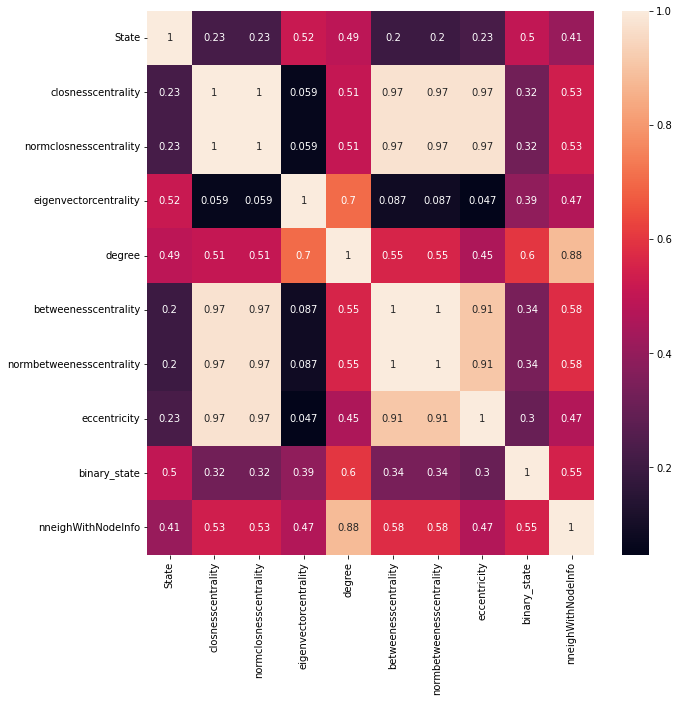

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(df_data.corr()), annot=True)
plt.show()

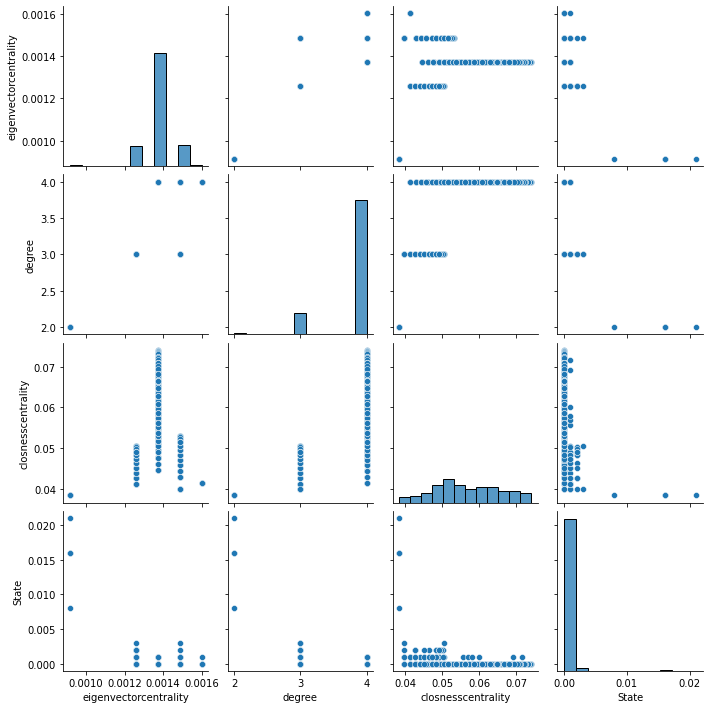

In [12]:
sns.pairplot(
    data=df_data[
        ['eigenvectorcentrality',
         'degree',
         'closnesscentrality',
         'State'
        ]
    ]
)

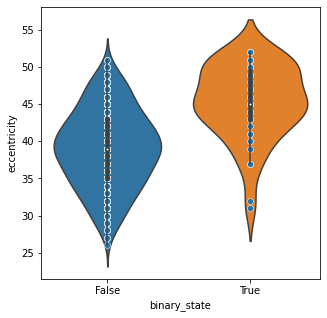

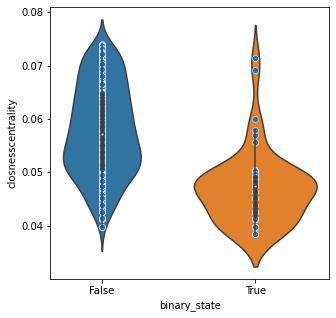

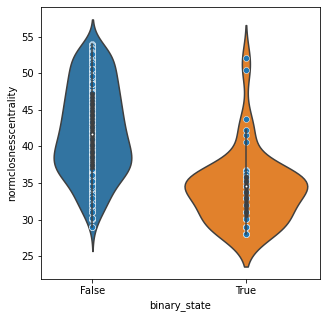

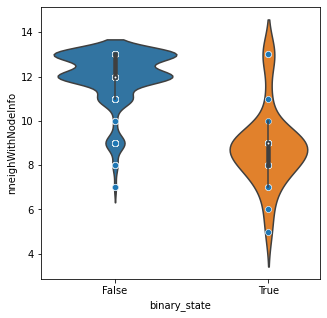

In [13]:
for col in ['eccentricity',
         'closnesscentrality',
         'normclosnesscentrality', 'nneighWithNodeInfo']:
    plt.figure(figsize=(5,5))
    sns.violinplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    sns.scatterplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    plt.show()

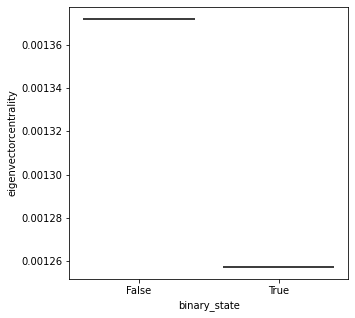

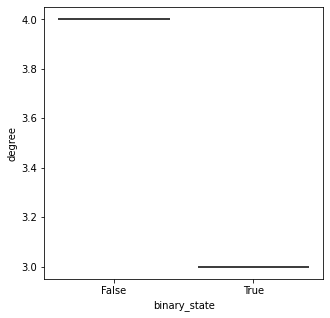

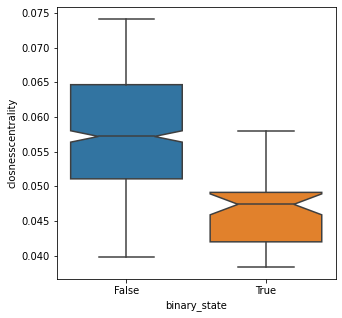

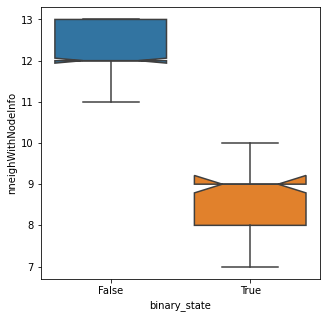

In [14]:
for col in ['eigenvectorcentrality',
         'degree',
         'closnesscentrality',
          'nneighWithNodeInfo' ]:
    plt.figure(figsize=(5,5))
    sns.boxplot(
        data=df_data,
        y=col,        
        x='binary_state',
        showfliers = False,
        notch=True
    )
    plt.show()

In [15]:
df_data.groupby('binary_state')['nneighWithNodeInfo'].describe()


,count,mean,std,min,25%,50%,75%,max
binary_state,,,,,,,,
False,674.0,11.98368,1.247178,7.0,12.0,12.0,13.0,13.0
True,55.0,8.80000,1.757524,5.0,8.0,9.0,9.0,13.0


<AxesSubplot:ylabel='Frequency'>

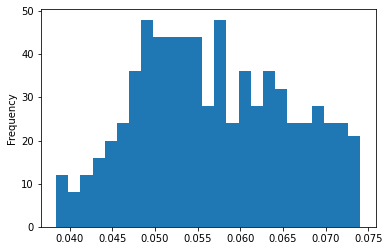

In [16]:
df_data['closnesscentrality'].plot(kind='hist', bins=25)

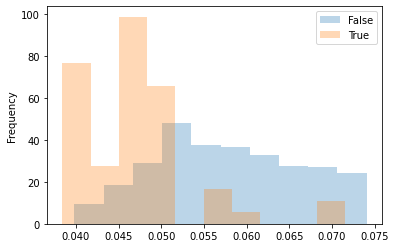

In [17]:
df_data.groupby('binary_state')['closnesscentrality'].plot(kind='hist', alpha=0.3, density=True)
plt.legend(loc='best')


In [18]:
joined_result_folder = '../joined_boxplot'

if not os.path.exists(joined_result_folder):
    os.mkdir(joined_result_folder)
    
df_data.to_pickle(f'{joined_result_folder}/grid.pkl')

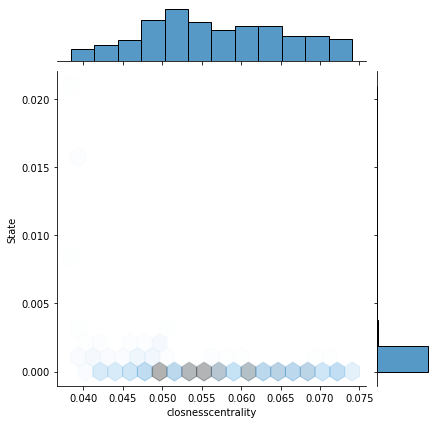

In [26]:
sns.jointplot(
    data=df_data,
    x='closnesscentrality',
    y='State',
   # hue='binary_state',
    alpha=0.3,
    kind="hex"
    #kind="reg",
     #logx=True
)
    

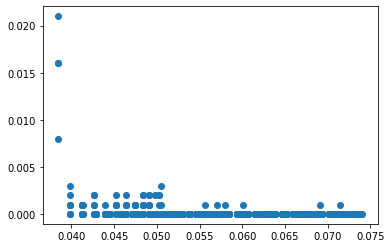

In [25]:
plt.scatter(
    x=df_data['closnesscentrality'],
    y=df_data['State'],
)


# Part II: Missing nodes at the end are the result of losses of information

In [43]:
def get_network_name(name):
    if "e+2304+v+512" in name:
        return "hypercube"
    if "e+51+v+27" in name:
        return "sun"
    if "e+15+v+14" in name:
        return "microservices"
    if "e+1273+v+512" in name:
        return "AS"
    if "spokecommunitycircle" in name:  
        return "spoke community"
    if "communitycircle" in name:  
        return "community"
    if "circle" in name:  
        return "circle"
    if "foresthubandspoke" in name:
        return "forest hub & spoke"
    if "longforesthubandspoke" in name:
        return "long forest hub & spoke"
    if "hubandspoke" in name:
        return "hub & spoke"
    if "scalefree" in name:
        return "scalefree"
    if "smallworld" in name:
        return "smallworld"
    

In [21]:
def gen_graph(roundData, maxIter, cat, network, pf):
    x = list(range(maxIter))
    avgs = []
    medians = []
    stdev = []
    difsmax = []
    difsmin = []
    for k in roundData.keys():   
        lst = roundData[k]
        avg = sum(lst) / len(lst)
        med = statistics.median(lst)
        medians.append(med)
        avgs.append(avg)
        var = sum((x-avg)**2 for x in lst) / len(lst)
        std = var**0.5
        difsmin.append(avg +std)
        difsmax.append(avg-std)
        stdev.append(stdev)
    fig, ax = plt.subplots()
    ax.plot(x, avgs, '-')
    plt.ylim(0, 1)
    ax.fill_between(x, difsmin, difsmax, alpha=0.2)
    ax.set_xlabel('round number')  # Add an x-label to the axes.
    ax.set_ylabel(cat)  # Add a y-label to the axes.
    ax.set_title(network + " pf=" + pf)  # Add a title to the axes.
    #ax.legend()  # Add a legend.
    
    
def load_JSON(cat):
    folder = './jsonDataReport'
    roundData = {}
   
    files = os.listdir(folder)
    for fname in files:
        with open(folder+'/'+fname, "r") as f:
            data = json.load(f)            
        network = get_network_name(fname)
        maxIter = int(data['maxIter'][0])
        pf = str(data['pf'][0])
        nhopsPrune = int(data['nhopsPrune'][0])        
        for i in range(maxIter):            
             df = pd.DataFrame(data[str(i)].values())             
             if i not in roundData:               
                 roundData[i] = []                    
             roundData[i].extend(df[cat].tolist())            
    return maxIter, roundData, network, pf

    
def load_JSON2(cat, prefix):
    folder = './jsonDataReport'
    roundData = {}
    import os    
    files = os.listdir(folder)
    for fname in files:
        if(prefix in fname):
            print("ntra")
            with open(folder+'/'+fname, "r") as f:
                data = json.load(f)            
            network = get_network_name(fname)
            maxIter = int(data['maxIter'][0])
            pf = str(data['pf'][0])
            nhopsPrune = int(data['nhopsPrune'][0])        
            for i in range(maxIter):            
                 df = pd.DataFrame(data[str(i)].values())             
                 if i not in roundData:               
                     roundData[i] = []                    
                 roundData[i].extend(df[cat].tolist())            
    return maxIter, roundData, network, pf

In [22]:
cat = 'percinfo'
maxIter, roundData, network, pf = load_JSON(cat)
gen_graph(roundData, maxIter, cat, network, pf)

KeyboardInterrupt: 

In [ ]:
cat = 'percinfohop'
maxIter, roundData, network, pf = load_JSON(cat)
gen_graph(roundData, maxIter, cat, network, pf)

In [ ]:
#a way to predict which node is going to fail
# have a counter of nodes that have info about a node
# evaluate betweeness centrality at each step see if we can associate probability of failure in runtime
# statistic analysis
#number of hops vs some network metric to kwon which information is going to be synch fast
cat = 'percinfohop'
maxIter, roundData, network, pf = load_JSON2(cat, "20211022133038")
gen_graph(roundData, maxIter, cat, network, pf)

In [ ]:
cat = 'percinfo'
maxIter, roundData, network, pf = load_JSON2(cat, "20211022133038")
gen_graph(roundData, maxIter, cat, network, pf)

## Dataframe creation

In [ ]:
folder = './jsonDataReport'
fname = "exp+ps+100+pf+0.0625+mode+FirstNeighbor+maxIter+50+e+127+v+100+scalefree+sn+4+eta+1+numSt+97+replalgon+NODELAY+nhopsinfo+redFactor+3+20211022115118+jsonDataReport.json"
with open(folder+'/'+fname, "r") as f:
    data = json.load(f)
df = pd.DataFrame(data[str(14)].values())   
df.head()

In [ ]:
df['status'].value_counts()

In [ ]:
data.keys()

In [ ]:
experiment_events = []
for round_number, round_info in data.items():
    try:
        for node_number, node_info in round_info.items():
            event_info = {
                'roundNumber': int(round_number),
                'nodeNumber': node_number
            }
            event_info.update(node_info)
            experiment_events.append(event_info)
    except:
        continue

In [ ]:
df_flattened_exp = pd.DataFrame(experiment_events)
df_flattened_exp.sort_values('roundNumber', inplace=True)
df_flattened_exp.head(1)

## Dataframe null check

TODO: Load all json files and obtain name of json file and name of files of nodes that are missing

In [ ]:
df_flattened_exp.isnull().sum()

## Nodes that have more rounds in failure state

In [ ]:
df_flattened_exp[df_flattened_exp['status'] == 'failed']['nodeNumber'].value_counts().to_frame()

## Nombres de nodos que en la última ronda no estaban vivos

In [ ]:
missing_nodes = list(df_flattened_exp[
    (df_flattened_exp['roundNumber'] == df_flattened_exp['roundNumber'].max()) &
    (df_flattened_exp['status'] == 'failed')
]['nodeNumber'].unique())

In [ ]:
missing_nodes

## Nodes Version

Each time that a node fails and it is recreated a new node version is added. 

In [ ]:
df_flattened_exp.groupby('nodeNumber')['version'].max().sort_values(ascending=False)

# Nodes that are missing at the end

In [55]:
def gen_graph(roundData, maxIter, cat, network, pf, id_node):
    x = list(range(maxIter))
    avgs = []
    medians = []
    stdev = []
    difsmax = []
    difsmin = []
    '''
    for k in roundData.keys():   
        lst = roundData[k]
        avg = sum(lst) / len(lst)
        med = statistics.median(lst)
        medians.append(med)
        avgs.append(avg)
        var = sum((x-avg)**2 for x in lst) / len(lst)
        std = var**0.5
        difsmin.append(avg +std)
        difsmax.append(avg-std)
        stdev.append(stdev)
    '''
    fig, ax = plt.subplots()
    ax.plot(x, roundData, '-')
    #plt.ylim(0, 1)
    #ax.fill_between(x, difsmin, difsmax, alpha=0.2)
    ax.set_xlabel('round number')  # Add an x-label to the axes.
    ax.set_ylabel(cat)  # Add a y-label to the axes.
    ax.set_title(network + " pf=" + pf + " node=" + id_node)  # Add a title to the axes.
    #ax.legend()  # Add a legend.

def load_JSON3(cat, prefix, id_node):
    folder = './jsonDataReport'
    roundData = {} 
    lvals = []
    files = os.listdir(folder)
    for fname in files:
        if(prefix in fname):
            #print("processing..." + fname + " node: " + id_node)
            with open(folder+'/'+fname, "r") as f:
                data = json.load(f)            
            network = get_network_name(fname)
            maxIter = int(data['maxIter'][0])
            pf = str(data['pf'][0])
            nhopsPrune = int(data['nhopsPrune'][0])        
            for i in range(maxIter):    
                if id_node in data[str(i)]:
                    #print(i, data[str(i)][id_node])
                    lvals.append(data[str(i)][id_node]["nneighWithNodeInfo"])
                else:
                    lvals.append(0)
    #print(lvals)
    return maxIter, lvals, network, pf


#for m_node in missing_nodes:    
#    cat = 'nneighWithNodeInfo'
#    maxIter, roundData, network, pf = load_JSON3(cat, "20211022115118", m_node)
#    gen_graph(roundData, maxIter, cat, network, pf)

In [56]:

folder = './jsonDataReport'
fname = "exp+ps+100+pf+0.0625+mode+FirstNeighbor+maxIter+50+e+127+v+100+scalefree+sn+4+eta+1+numSt+97+replalgon+NODELAY+nhopsinfo+redFactor+3+20211022133038+jsonDataReport.json"
with open(folder+'/'+fname, "r") as f:
    data = json.load(f)
df = pd.DataFrame(data[str(14)].values())   
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './jsonDataReport/exp+ps+100+pf+0.0625+mode+FirstNeighbor+maxIter+50+e+127+v+100+scalefree+sn+4+eta+1+numSt+97+replalgon+NODELAY+nhopsinfo+redFactor+3+20211022133038+jsonDataReport.json'

In [57]:
df['status'].value_counts()

alive     664
failed     65
Name: status, dtype: int64

In [58]:
data.keys()

dict_keys(['44', '45', '46', '47', '48', '49', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '20', '21', 'nhopsPrune', '22', '23', '24', '25', '26', '27', '28', '29', 'maxIter', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', 'pf', '40', '41', '42', '43'])

# Graphics of nodes that failed at the end - Number of nodes that have information about a missing node:

In [59]:
def get_exp_events(data):
    experiment_events = []
    for round_number, round_info in data.items():
        try:
            for node_number, node_info in round_info.items():
                event_info = {
                    'roundNumber': int(round_number),
                    'nodeNumber': node_number
                }
                event_info.update(node_info)
                experiment_events.append(event_info)
        except:
            continue
    return experiment_events

In [60]:
def get_df_exp_events(experiment_events):
    df_flattened_exp = pd.DataFrame(experiment_events)
    df_flattened_exp.sort_values('roundNumber', inplace=True)
    df_flattened_exp.head(1)
    return df_flattened_exp

In [61]:
def get_missing_nodes(df_flattened_exp):
    missing_nodes = list(df_flattened_exp[
        (df_flattened_exp['roundNumber'] == df_flattened_exp['roundNumber'].max()) &
        (df_flattened_exp['status'] == 'failed')
    ]['nodeNumber'].unique())
    return missing_nodes

In [62]:
def draw_missing_nodes_info(missing_nodes):
    for k in missing_nodes.keys():
        cat = 'nneighWithNodeInfo'        
        for m_node in missing_nodes[k]:
            maxIter, roundData, network, pf = load_JSON3(cat, k, m_node)
            gen_graph(roundData, maxIter, cat, network, pf, m_node)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

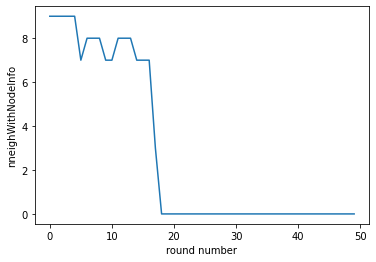

In [63]:
folder = './jsonDataReport'
roundData = {}
missing_nodes = {}
files = os.listdir(folder)
c = 0
limit = 50
for fname in files:
    if c > limit:
        break
    c+=1

    with open(folder+'/'+fname, "r") as f:
        data = json.load(f)
        df = pd.DataFrame(data[str(14)].values())   
        #df.head()
        exp_events = get_exp_events(data)
        df_flattened_exp = get_df_exp_events(exp_events)
        missing_nodes[fname] = get_missing_nodes(df_flattened_exp)

#print("missing:",missing_nodes)
draw_missing_nodes_info(missing_nodes)

# Historic of nneighbor vs historic status

In [65]:
from pprint import pprint


In [151]:
files = os.listdir(folder)
folder = './jsonDataReport'
roundData = {}
missing_nodes = {}
files = os.listdir(folder)
node_histories = {}
for filenumber, fname in enumerate(files[:5]):  # Limited to 30 experiments
    formatted_fname = folder+'/'+fname
    with open(formatted_fname, "r") as f:
        data = json.load(f)

        valid_round_numbers = []
        for round_number in data.keys():
            if round_number.isnumeric():
                valid_round_numbers.append(round_number)
        data = {int(k): v for k, v in data.items() if k in valid_round_numbers}
        
        
        for round_number in sorted(data.keys()):
            for node, node_info in data[round_number].items():
                if node not in node_histories.keys():
                    node_histories[node] = {'nneighWithNodeInfo': [], 'status': []}
                node_nneighWithNodeInfo = node_info['nneighWithNodeInfo']
                node_status = node_info['status']

                node_histories[node]['nneighWithNodeInfo'].append(node_nneighWithNodeInfo)
                node_histories[node]['status'].append(node_status)
    if (filenumber % 10) == 0:
        print(f"Processed {filenumber} files out of {len(files)}")

Processed 0 files out of 1000


In [152]:
node_statuses = []
node_nneighbors = []
round_numbers = []

for node_number, node_history in enumerate(node_histories.values()):
    node_statuses.extend(
        node_history['status']
    )
    node_nneighbors.extend(
        node_history['nneighWithNodeInfo']
    )
    round_numbers.extend(
        np.arange(
            len(node_history['status'])
        )
    )

df_history = pd.DataFrame({
    'status': node_statuses,
    'nneighWithNodeInfo': node_nneighbors,
    'round_number': round_numbers
})

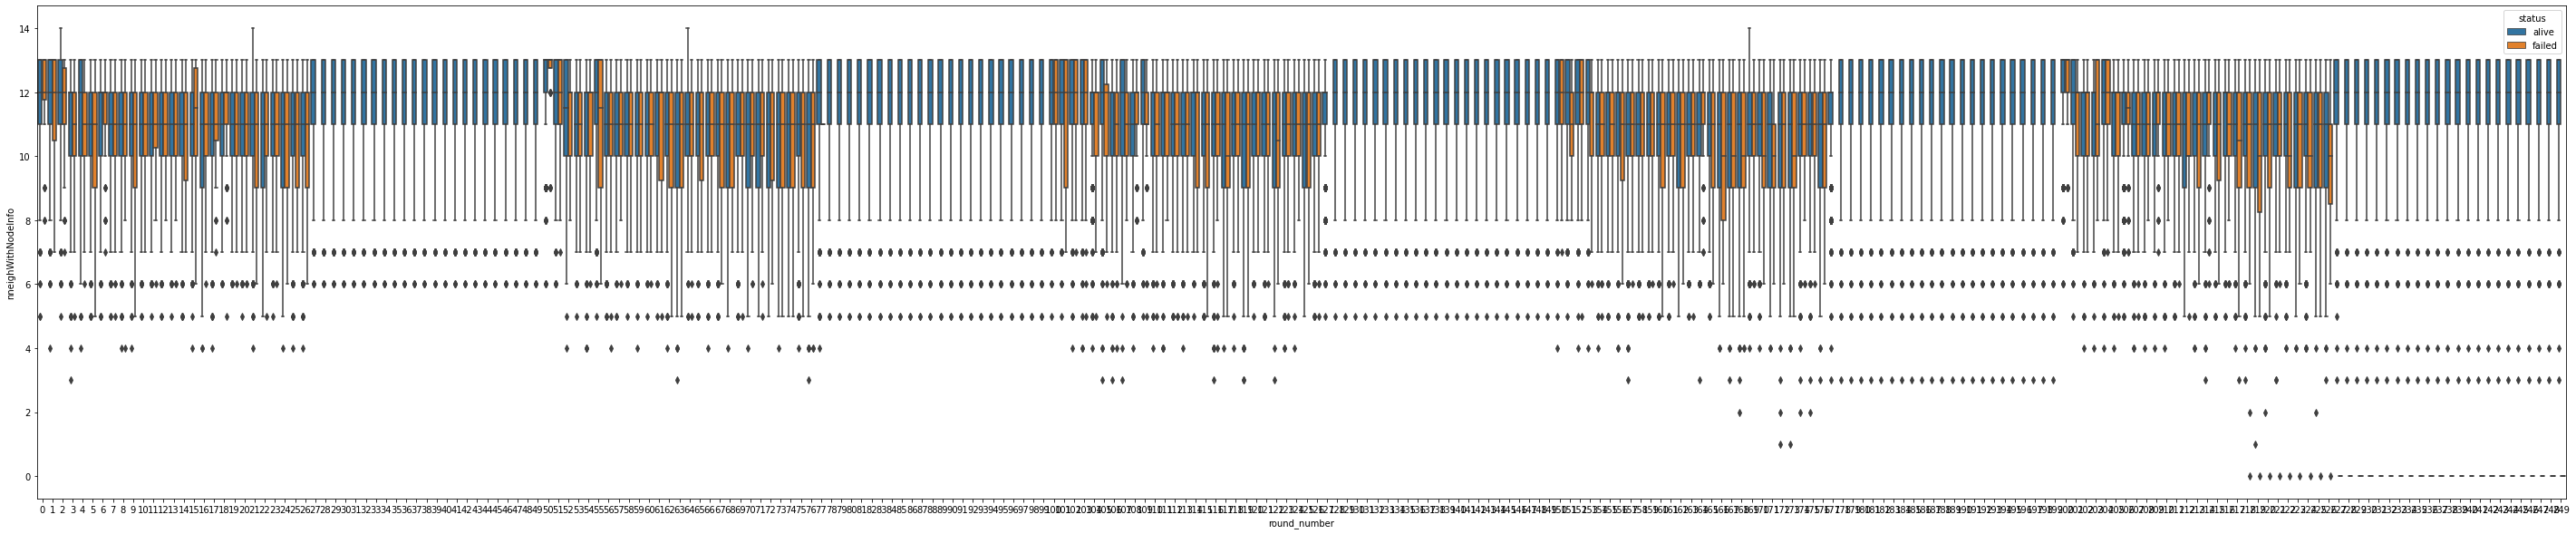

In [153]:
plt.figure(figsize=(50,10))
sns.boxplot(
    data=df_history,
    x='round_number',
    y='nneighWithNodeInfo',
    hue='status'
)
plt.show()

## History nneighbor vs final status

In [148]:
files = os.listdir(folder)
folder = './jsonDataReport'
roundData = {}
missing_nodes = {}
files = os.listdir(folder)
node_histories_final_status = {}
for filenumber, fname in enumerate(files[:5]):
    formatted_fname = folder+'/'+fname
    with open(formatted_fname, "r") as f:
        data = json.load(f)

        valid_round_numbers = []
        for round_number in data.keys():
            if round_number.isnumeric():
                valid_round_numbers.append(round_number)
        data = {int(k): v for k, v in data.items() if k in valid_round_numbers}
        
        last_round_number = sorted(data.keys())[-1]
        
        node_statuses = data[last_round_number]
        
        for round_number in sorted(data.keys()):
            for node, node_info in data[round_number].items():
                if node not in node_histories_final_status.keys():
                    node_histories_final_status[node] = {'nneighWithNodeInfo': [], 'status': []}
                node_nneighWithNodeInfo = node_info['nneighWithNodeInfo']
                node_status = node_statuses[node]['status']

                node_histories_final_status[node]['nneighWithNodeInfo'].append(node_nneighWithNodeInfo)
                node_histories_final_status[node]['status'].append(node_status)
    if (filenumber % 10) == 0:
        print(f"Processed {filenumber} files out of {len(files)}")

Processed 0 files out of 1000


In [149]:
node_statuses = []
node_nneighbors = []
round_numbers = []

for node_number, node_history in enumerate(node_histories_final_status.values()):
    node_statuses.extend(
        node_history['status']
    )
    node_nneighbors.extend(
        node_history['nneighWithNodeInfo']
    )
    round_numbers.extend(
        np.arange(
            len(node_history['status'])
        )
    )

df_history_final_status = pd.DataFrame({
    'status': node_statuses,
    'nneighWithNodeInfo': node_nneighbors,
    'round_number': round_numbers
})

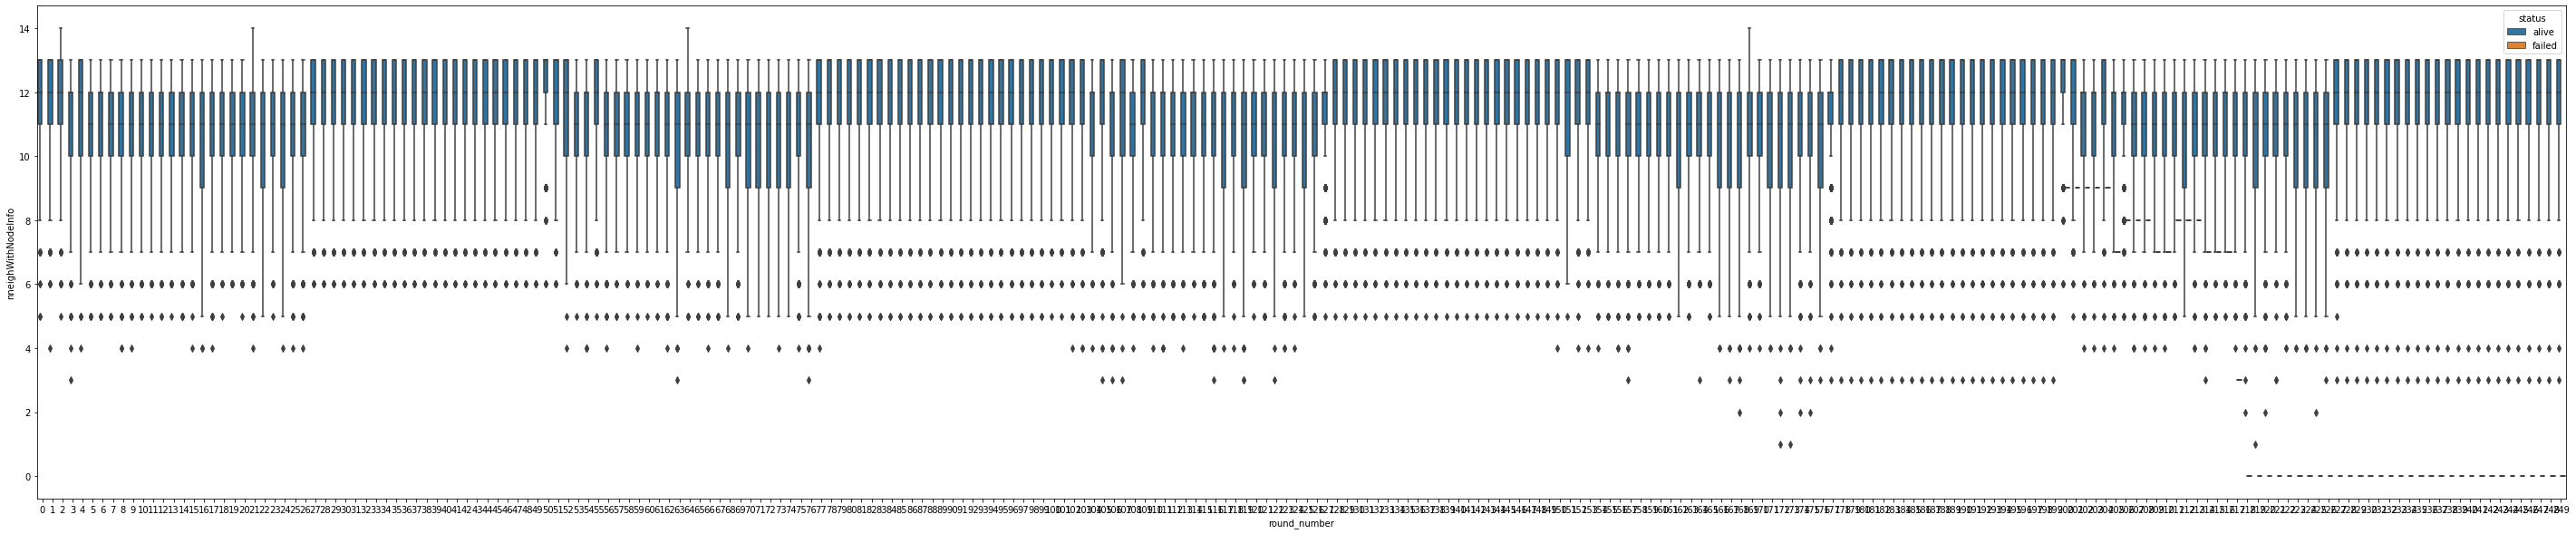

In [150]:
plt.figure(figsize=(50,10))
sns.boxplot(
    data=df_history_final_status,
    x='round_number',
    y='nneighWithNodeInfo',
    hue='status'
)
plt.show()